In [60]:
#Import modules
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [57]:
#Define function that calculates the magnitude of a 3D vector
def magnitude(x,y,z):
    
    mag = pow(
                pow(x, 2)
              + pow(y, 2)
              + pow(z, 2)
                        , 0.5)
    
    return(mag)

In [ ]:
#Open data label file
label_file = open('features.txt','r')

#Create lists for column position and name
data_keys = []
data_names = []

for line in label_file.readlines():
    #Split the line into the column number & label
    line = line.split(' ')
    
    #Clean up the column name
    col_name = line[1].rstrip()
    col_name = col_name.replace('()','')
    col_name = col_name.replace('-','_')
    col_name = col_name.replace('Body','')
    col_name = col_name.replace('mean','Mean')
    col_name = col_name.replace('std','STD')
    
    #Extract columns of interest (Mean, STD, skewness and kurtosis for X,Y,Z axes)
    if 'Mean_' in col_name:
        data_names.append(col_name)
        data_keys.append(int(line[0]))
    
    elif 'STD_' in col_name:
        data_names.append(col_name)
        data_keys.append(int(line[0]))
    
    elif 'skewness_' in col_name:
        data_names.append(col_name)
        data_keys.append(int(line[0]))
    
    elif 'kurtosis_' in col_name:
        data_names.append(col_name)
        data_keys.append(int(line[0]))

In [50]:
#Print column names for reference
print('\n'.join(data_names))

tAcc_Mean_X
tAcc_Mean_Y
tAcc_Mean_Z
tAcc_STD_X
tAcc_STD_Y
tAcc_STD_Z
tGravityAcc_Mean_X
tGravityAcc_Mean_Y
tGravityAcc_Mean_Z
tGravityAcc_STD_X
tGravityAcc_STD_Y
tGravityAcc_STD_Z
tAccJerk_Mean_X
tAccJerk_Mean_Y
tAccJerk_Mean_Z
tAccJerk_STD_X
tAccJerk_STD_Y
tAccJerk_STD_Z
tGyro_Mean_X
tGyro_Mean_Y
tGyro_Mean_Z
tGyro_STD_X
tGyro_STD_Y
tGyro_STD_Z
tGyroJerk_Mean_X
tGyroJerk_Mean_Y
tGyroJerk_Mean_Z
tGyroJerk_STD_X
tGyroJerk_STD_Y
tGyroJerk_STD_Z
fAcc_Mean_X
fAcc_Mean_Y
fAcc_Mean_Z
fAcc_STD_X
fAcc_STD_Y
fAcc_STD_Z
fAcc_skewness_X
fAcc_kurtosis_X
fAcc_skewness_Y
fAcc_kurtosis_Y
fAcc_skewness_Z
fAcc_kurtosis_Z
fAccJerk_Mean_X
fAccJerk_Mean_Y
fAccJerk_Mean_Z
fAccJerk_STD_X
fAccJerk_STD_Y
fAccJerk_STD_Z
fAccJerk_skewness_X
fAccJerk_kurtosis_X
fAccJerk_skewness_Y
fAccJerk_kurtosis_Y
fAccJerk_skewness_Z
fAccJerk_kurtosis_Z
fGyro_Mean_X
fGyro_Mean_Y
fGyro_Mean_Z
fGyro_STD_X
fGyro_STD_Y
fGyro_STD_Z
fGyro_skewness_X
fGyro_kurtosis_X
fGyro_skewness_Y
fGyro_kurtosis_Y
fGyro_skewness_Z
fGyro_kurtosis_

In [45]:
#Open data file
data_file = open('X_train.txt','r')

#Create blank data frame to receive data
raw_data = pd.DataFrame(columns=data_names)

#Read each line from the text file while enumerating
for idx,line in enumerate(data_file.readlines()):
    
    #Split the line into each column and remove empty entries
    line = line.split(' ')
    line = [val for val in line if val != '']
    
    #Capture selected data from line and insert into data frame
    raw_data.loc[idx] = [float(line[i]) for i in data_keys]

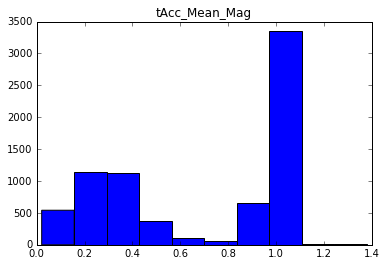

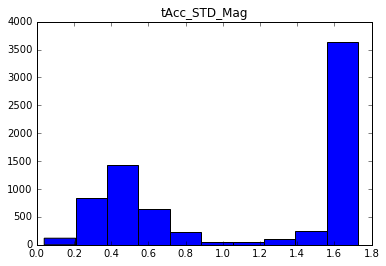

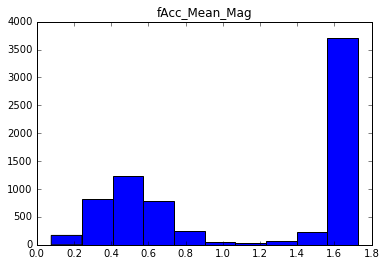

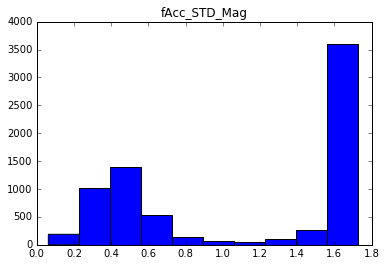

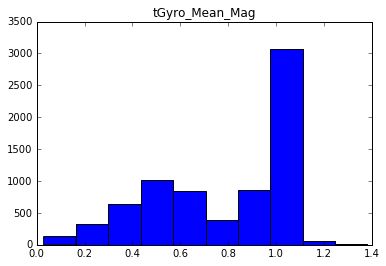

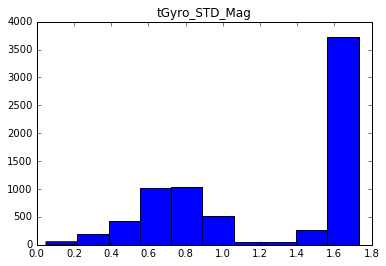

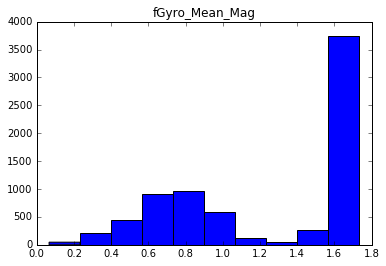

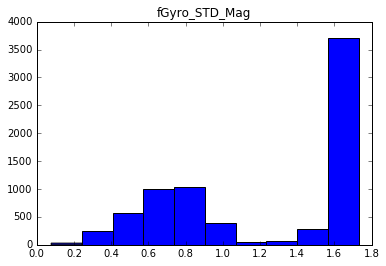

In [79]:
#Plot histograms for a handful of variables to understand
#data distribution.
suffix = ['_Mean_X','_Mean_Y','_Mean_Z','_STD_X','_STD_Y','_STD_Z']
prefix = ['tAcc','fAcc','tGyro','fGyro']

for p in prefix:
    
    for i in range(2):
        
        plt.figure()
        
        plt.hist( magnitude(raw_data[p + suffix[3*i]], 
                            raw_data[p + suffix[3*i + 1]], 
                            raw_data[p + suffix[3*i + 2]]).values )
        
        if i == 0:
            plt.title(p+'_Mean_Mag')
        else:
            plt.title(p+'_STD_Mag')

#Histograms show that a single variable doesn't offer much insight into the six
#different activities.  There are only two prominent peaks in the graphs below
#indicating a group of activities appear the same for a given variable.
#A collection of variables will be needed to separate the data into the
#activities.